In [263]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go
import plotly.express as px

chocolate_sales = pd.read_csv('Chocolate Sales.csv')

# Inspecting and cleaning

In [264]:
chocolate_sales.info()
chocolate_sales['Amount'] = chocolate_sales['Amount'].str.replace(r'[\$,]', '', regex=True)
chocolate_sales['Amount'] = pd.to_numeric(chocolate_sales['Amount'], errors='coerce')
chocolate_sales['Date'] = pd.to_datetime(chocolate_sales['Date'], format='mixed')
chocolate_sales['Product'] = chocolate_sales['Product'].astype(str).str.strip()
chocolate_sales.info()
print(chocolate_sales.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1094 entries, 0 to 1093
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Sales Person   1094 non-null   object
 1   Country        1094 non-null   object
 2   Product        1094 non-null   object
 3   Date           1094 non-null   object
 4   Amount         1094 non-null   object
 5   Boxes Shipped  1094 non-null   int64 
dtypes: int64(1), object(5)
memory usage: 51.4+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1094 entries, 0 to 1093
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Sales Person   1094 non-null   object        
 1   Country        1094 non-null   object        
 2   Product        1094 non-null   object        
 3   Date           1094 non-null   datetime64[ns]
 4   Amount         1094 non-null   int64         
 5   Boxes Shipped  1094 non-null   

# Exploratory Data Analysis

In [265]:
#seller performance
seller_performance = chocolate_sales.groupby('Sales Person')['Amount'].sum().sort_values(ascending=True).reset_index()
print("Sales Team Performance:")
print(seller_performance, "\n")
#product performance
product_performance = chocolate_sales.groupby('Product')['Amount'].sum().sort_values(ascending=True).reset_index()
print("Product Performance:")
print(product_performance, "\n")
#total company revenue
total_company_revenue = chocolate_sales['Amount'].sum()
print(f"Our total company revenue is ${total_company_revenue:,.0f}")
#top 3 products
top_5_products = product_performance.nlargest(5, 'Amount')[['Product', 'Amount']].reset_index(drop=True)
print("Top 5 Products:")
print(top_5_products, "\n")
#grabbing our top 3 sales reps
top_3_sales_reps = seller_performance.nlargest(3, 'Amount')[['Sales Person', 'Amount']].reset_index(drop=True)
print("Top 3 Sales Reps:")
print(top_3_sales_reps, "\n")
#great now we will grab more data from our df that matches the info we have in our top 3 reps list so we can get the products and total amount in sales for each one
top_3_sales_reps_performance = (
    chocolate_sales[chocolate_sales['Sales Person'].isin(top_3_sales_reps['Sales Person'])]
    [['Sales Person', 'Product', 'Amount']].sort_values(by='Sales Person', ascending=False).reset_index(drop=True)
    )
#grouping and sorting to make it look nicer
grouped_top_3_performance = (
    top_3_sales_reps_performance.groupby(['Sales Person', 'Product'], as_index=False)
    ['Amount'].sum().sort_values(['Sales Person', 'Amount'], ascending= [True, False]).reset_index(drop=True)
    )
print(grouped_top_3_performance, "\n")
#grabbing our top sales rep
top_sales_rep = seller_performance.loc[seller_performance['Amount'].idxmax(), 'Sales Person']
top_revenue = seller_performance.loc[seller_performance['Amount'].idxmax(), 'Amount']
print(f"Top Sales Rep: {top_sales_rep} Total Revenue: ${top_revenue} ")
#what percentage of total revenue of the company is made by our top seller?
percentage_of_total_revenue = (top_revenue / total_company_revenue * 100).round(2)
other_revenue = total_company_revenue - top_revenue
print(f"{top_sales_rep} is responsible for {percentage_of_total_revenue}% of the company revenue.", "\n")
#whats our top country for revenue?
country_performance = chocolate_sales.groupby('Country')['Amount'].sum().sort_values(ascending=True).reset_index()
print("Performance by Country:")
print(country_performance, "\n")
#top_country = country_performance.nlargest(1, 'Amount')[['Country', 'Amount']].reset_index(drop=True)
top_country = country_performance.loc[country_performance['Amount'].idxmax(), 'Country']
country_amount = country_performance.loc[country_performance['Amount'].idxmax(), 'Amount']
total_revenue_from_other_countries = total_company_revenue - country_amount
print(f"Top Country for Revenue: {top_country} (${country_amount:,.0f})", "\n")
#and what percentage of our whole revenue does our top performing country make?
top_country_percent_of_total_revenue = (country_amount / total_company_revenue * 100).round(2)
print(f"{top_country} is responsible for {top_country_percent_of_total_revenue}% of the company revenue.")




Sales Team Performance:
           Sales Person  Amount
0        Wilone O'Kielt  138523
1        Dotty Strutley  190624
2        Camilla Castle  196616
3        Mallorie Waber  200592
4        Andria Kimpton  201747
5          Husein Augar  205212
6   Rafaelita Blaksland  210245
7        Curtice Advani  216461
8          Jan Morforth  219667
9        Jehu Rudeforth  220976
10     Karlen McCaffrey  223895
11         Gigi Bohling  232666
12      Gunar Cockshoot  238483
13      Roddy Speechley  251062
14         Barr Faughny  258713
15       Marney O'Breen  259742
16          Kaine Padly  266490
17       Beverie Moffet  278922
18  Dennison Crosswaite  291669
19          Van Tuxwell  303149
20        Kelci Walkden  311710
21          Brien Boise  312816
22      Madelene Upcott  316099
23           Oby Sorrel  316645
24         Ches Bonnell  320901 

Product Performance:
                 Product  Amount
0         70% Dark Bites  211610
1   Caramel Stuffed Bars  231588
2   Choco Coated Almon

# Plotting

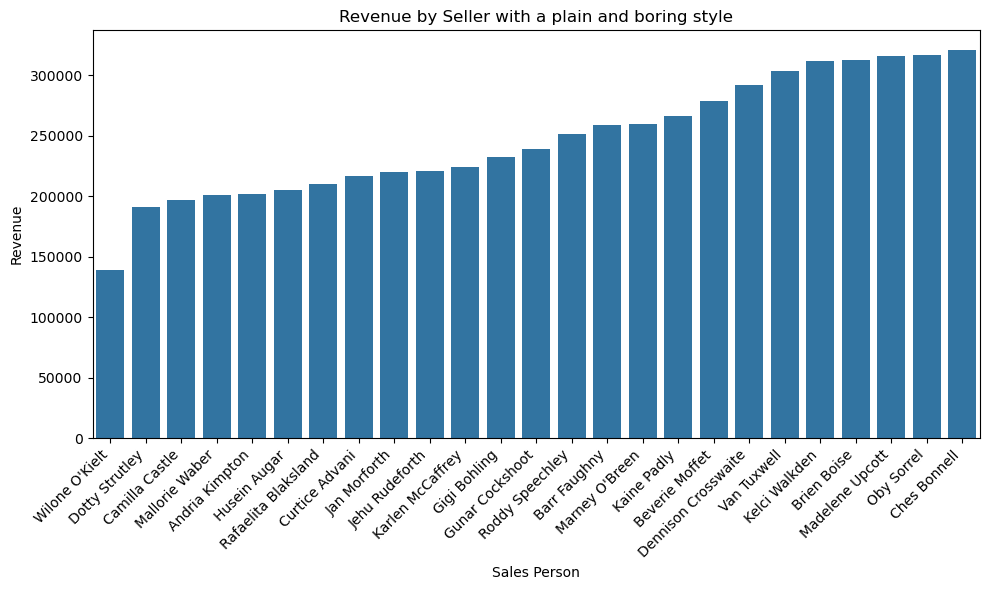

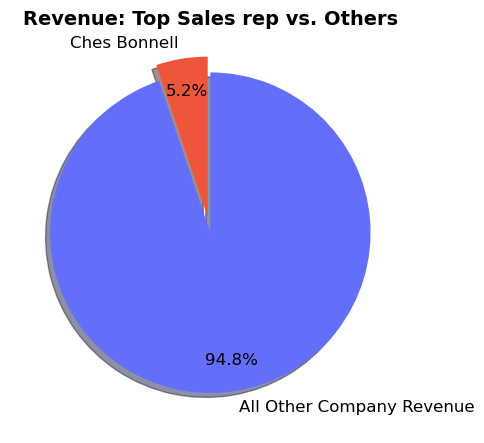

In [266]:
# plotting our seller performance
# This chart although informative, looked boring.
plt.figure(figsize=(10, 6))
sns.barplot(data=seller_performance, x='Sales Person', y='Amount')
plt.xticks(rotation=45, ha='right')
plt.ylabel('Revenue')
plt.title('Revenue by Seller with a plain and boring style')
plt.tight_layout()
plt.show()

# So I had the idea to learn how to make an interactive chart that is more informative as you hover over each bar.
# replotting our seller performance
fig = go.Figure(data=[go.Bar(x=seller_performance['Sales Person'], y=seller_performance['Amount'])])
fig.update_traces(hovertemplate='%{x}: %{y:$,.2f}<extra></extra>')
fig.update_layout(title="Revenue by Seller with Hover Labels",xaxis_title="Sales Person", yaxis_title="Revenue", template='plotly_dark')
fig.show()

# plotting our product performance
fig = go.Figure(data=[go.Bar(x=product_performance['Product'], y=product_performance['Amount'])])
fig.update_traces(hovertemplate='%{x}: %{y:$,.2f}<extra></extra>')
fig.update_layout(title="Revenue by Product with Hover Labels",xaxis_title="Product", yaxis_title="Revenue", template='plotly_dark')
fig.show()

#plotting a visual for the revenue our top sales rep brings in
labels = [f"{top_sales_rep}", "All Other Company Revenue"]
sizes = [top_revenue, other_revenue]
colors = ["#EF553B", "#636EFA"]
explode = (0.1, 0)
plt.figure(figsize=(5, 5))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', pctdistance=.8, labeldistance=1.1, startangle=90, colors=colors, explode=explode, shadow=True, textprops={'fontsize': 12})
plt.title("Revenue: Top Sales rep vs. Others", fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

#plotting it again but lets make it interactive on hover by using plotly!
labels = [f"{top_sales_rep}", "All Other Company Revenue"]
values = [top_revenue, other_revenue]
fig = go.Figure(
    data=[
        go.Pie(
            labels=labels, values=values, pull=[0.2, 0], marker=dict(colors=["#EF553B", "#636EFA"]), 
            textinfo='label+percent', texttemplate='%{label}<br>%{percent:.1%}', 
            hovertemplate='%{label}<br>$%{value:,.0f} (%{percent:.1%})<extra></extra>')]
            )
fig.update_layout(autosize=False, width=800, height=600, title_text="<b>Top Performing Sales Rep's Revenue Share", title_x=0.5, font=dict(size=14))
fig.show()

#plotting a visual for the revenue of our top earning country
labels = [f"{top_country}", "All Other Company Revenue"]
values = [country_amount, total_revenue_from_other_countries]
fig = go.Figure(data=[go.Pie(labels=labels, values=values, pull=[0.1, 0], marker=dict(colors=["#EF553B", "#636EFA"]), textinfo='label+percent')])
fig.update_layout(autosize=False, width=800, height=600, title_text="<b>Top Performing Country's Revenue Share", title_x=0.5, font=dict(size=14))
fig.show()

#plotting a visual of the top 5 selling products revenue compared to the rest of company revenue
labels = top_5_products['Product'].tolist() + ["All Other Product Sales"]
values = top_5_products['Amount'].tolist() + [other_revenue]

fig = go.Figure(
    data=[
        go.Pie(
            labels=labels,
            values=values,
            textposition='outside',
            rotation=345,
            pull=[0.1 if label != "All Other Product Sales" else 0 for label in labels],
            marker=dict(colors=["#DE541E", "#FFC09F", "#462749", "#D1C8E1", "#7DCFB6", "#636efa"]),
            texttemplate='%{label}<br>%{percent:.1%}',
            hovertemplate='%{label}<br>$%{value:,.0f} (%{percent:.1%})<extra></extra>',
            automargin=True)]
)

fig.update_layout(
    autosize=False, width=800, height=600,
    title_text="<b>Top 5 Selling Products Share of Total Company Revenue",
    title_x=0.5,
    font=dict(size=13)
)

fig.show()


